In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Load the dataset
data = pd.read_csv(r'C:\Users\archa\Desktop\TelecomChurn\telecom_churn_data.csv')
print(data.head())


   mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...     

In [3]:
import pandas as pd

file_path = r"C:\Users\archa\Desktop\TelecomChurn\telecom_churn_data.csv"  # Check the correct file name!
df = pd.read_csv(file_path)

print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")



Number of rows: 99999
Number of columns: 226


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
import pandas as pd

def check_missing_values(dataframe):
    missing_values = dataframe.isnull().mean().mul(100).round(2).to_frame(name='null').sort_values(by='null', ascending=False)
    return missing_values

# Example usage:
df_missing_columns = check_missing_values(df)  # Pass your DataFrame as an argument
print(df_missing_columns)


                    null
arpu_3g_6          74.85
night_pck_user_6   74.85
total_rech_data_6  74.85
arpu_2g_6          74.85
max_rech_data_6    74.85
...                  ...
max_rech_amt_7      0.00
max_rech_amt_6      0.00
total_rech_amt_9    0.00
total_rech_amt_8    0.00
sep_vbc_3g          0.00

[226 rows x 1 columns]


In [6]:
# Calculate percentage of missing values in each column
missing_percent = data.isnull().sum() * 100 / len(data)
print("Percentage of missing values in columns:\n", missing_percent)

Percentage of missing values in columns:
 mobile_number     0.00000
circle_id         0.00000
loc_og_t2o_mou    1.01801
std_og_t2o_mou    1.01801
loc_ic_t2o_mou    1.01801
                   ...   
aon               0.00000
aug_vbc_3g        0.00000
jul_vbc_3g        0.00000
jun_vbc_3g        0.00000
sep_vbc_3g        0.00000
Length: 226, dtype: float64


In [7]:
# List columns with more than 30% missing values
columns_to_drop = df.isnull().mean().mul(100)  # Calculate missing value percentage
columns_to_drop = columns_to_drop[columns_to_drop > 30].index.tolist()  # Filter columns with >30% missing values

print("Columns with more than 30% missing values:\n", columns_to_drop)


Columns with more than 30% missing values:
 ['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']


In [8]:
# Drop columns with more than 30% missing values
data = data.drop(columns=columns_to_drop)
print("Columns after dropping:\n", data.columns)

Columns after dropping:
 Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object', length=186)


In [9]:
df.shape

(99999, 226)

In [10]:
# List date columns
date_columns = [col for col in data.columns if 'date' in col.lower()]
print("Date columns:\n", date_columns)

Date columns:
 ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [11]:
# Drop date columns and circle_id
data = data.drop(columns=date_columns + ['circle_id'])
print("Columns after dropping date columns and circle_id:\n", data.columns)

Columns after dropping date columns and circle_id:
 Index(['mobile_number', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7',
       ...
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object', length=177)


In [12]:
# Calculate average recharge amount for months 6 and 7
data['avg_rech_amt_6_7'] = (data['total_rech_amt_6'] + data['total_rech_amt_7']) / 2

In [13]:
# Find 70th percentile
X = data['avg_rech_amt_6_7'].quantile(0.7)
print("70th percentile of average recharge amount:", X)

70th percentile of average recharge amount: 368.5


In [15]:
# Filter high-value customers
high_value_customers = data[data['avg_rech_amt_6_7'] >= X]
print("Number of high-value customers:", len(high_value_customers))

Number of high-value customers: 30011


In [16]:
# Count rows with more than 50% missing values
rows_to_drop = high_value_customers[high_value_customers.isnull().mean(axis=1) > 0.5]
print("Rows with more than 50% missing values:", len(rows_to_drop))

Rows with more than 50% missing values: 114


In [17]:
# Check missing values again
missing_percent = high_value_customers.isnull().sum() * 100 / len(high_value_customers)
print("Percentage of missing values after dropping rows:\n", missing_percent)

Percentage of missing values after dropping rows:
 mobile_number       0.000000
loc_og_t2o_mou      0.379861
std_og_t2o_mou      0.379861
loc_ic_t2o_mou      0.379861
arpu_6              0.000000
                      ...   
aug_vbc_3g          0.000000
jul_vbc_3g          0.000000
jun_vbc_3g          0.000000
sep_vbc_3g          0.000000
avg_rech_amt_6_7    0.000000
Length: 178, dtype: float64


In [19]:
# Identify rows with more than 50% missing values
df_missing_rows_50 = df[df.isnull().mean(axis=1) > 0.5]

# Drop these rows from the DataFrame
df = df.drop(df_missing_rows_50.index)

# Print the updated shape of the DataFrame
print(df.shape)


(97703, 226)


In [20]:
# List columns for each month and handle missing values
for month in ['6', '7', '8', '9']:
    mou_columns = [col for col in high_value_customers.columns if f'mou_{month}' in col]
    print(f"Columns for MOU {month}:\n", mou_columns)
    
    # Drop rows where MOU for the month is null
    high_value_customers = high_value_customers.dropna(subset=mou_columns)
    print(f"Rows after dropping MOU {month} nulls:", len(high_value_customers))

Columns for MOU 6:
 ['onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2c_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2o_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6']
Rows after dropping MOU 6 nulls: 29695
Columns for MOU 7:
 ['onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7', 'total_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic

In [21]:
import numpy as np

# Ensure high_value_customers is a separate copy to prevent the warning
high_value_customers = high_value_customers.copy()

# Tag churners based on usage in month 9
high_value_customers.loc[:, 'churn'] = np.where(
    (high_value_customers['total_ic_mou_9'] == 0) & 
    (high_value_customers['total_og_mou_9'] == 0) & 
    (high_value_customers['vol_2g_mb_9'] == 0) & 
    (high_value_customers['vol_3g_mb_9'] == 0), 1, 0
)


In [22]:
# List columns for churn month (9)
churn_columns = [col for col in high_value_customers.columns if '_9' in col]
print("Churn month columns:\n", churn_columns)

Churn month columns:
 ['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [23]:
# Drop churn month columns and sep_vbc_3g
high_value_customers = high_value_customers.drop(columns=churn_columns + ['sep_vbc_3g'])

In [24]:
# Calculate churn percentage
churn_percentage = high_value_customers['churn'].mean() * 100
print("Churn percentage:", churn_percentage)

Churn percentage: 3.39037547783216


In [25]:
# List numeric columns
numeric_columns = high_value_customers.select_dtypes(include=[np.number]).columns
print("Numeric columns:\n", numeric_columns)

Numeric columns:
 Index(['mobile_number', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8',
       ...
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'avg_rech_amt_6_7', 'churn'],
      dtype='object', length=136)


In [26]:
# Remove outliers
for col in numeric_columns:
    lower_bound = high_value_customers[col].quantile(0.10)
    upper_bound = high_value_customers[col].quantile(0.90)
    high_value_customers = high_value_customers[(high_value_customers[col] >= lower_bound) & (high_value_customers[col] <= upper_bound)]

In [27]:
# List of columns to compare between month 8 and month 6
columns_to_compare = ['total_mou', 'total_rech_num', 'total_rech_amt', 'arpu', 'vbc']
# Calculate the decrease in values for each column by subtracting month 6 values from month 8 values.
# If a column is missing, default to 0 to prevent errors.
for col in columns_to_compare:
    high_value_customers[f'decrease_{col}_action'] = high_value_customers.get(f'{col}_8', 0) - high_value_customers.get(f'{col}_6', 0)


In [28]:
# Total MOU during the good phase (incoming and outgoing calls)
data['total_mou_good'] = data['total_og_mou_6'] + data['total_ic_mou_6']


In [29]:
# Average MOU during the action phase
# We are taking the average because the action phase includes two months (7 and 8).
data['avg_mou_action'] = (data['total_og_mou_7'] + data['total_og_mou_8'] + data['total_ic_mou_7'] + data['total_ic_mou_8']) / 2


In [30]:
# Difference avg_mou_good and avg_mou_action
data['diff_mou'] = data['avg_mou_action'] - data['total_mou_good']

In [31]:
# Checking whether the mou has decreased in action phase
data['decrease_mou_action'] = np.where((data['diff_mou'] < 0), 1, 0)

In [32]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action
0,7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,...,968,30.4,0.0,101.20,3.58,307.0,0.00,2.720,2.720,0
1,7001865778,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,...,1006,0.0,0.0,0.00,0.00,229.0,67.14,509.240,442.100,0
2,7001625959,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.54,55.24,...,1103,0.0,0.0,4.17,0.00,241.5,525.37,806.480,281.110,0
3,7001204172,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,54.39,...,2491,0.0,0.0,0.00,0.00,270.0,503.31,378.630,-124.680,1
4,7000142493,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.31,149.44,...,1526,0.0,0.0,0.00,0.00,273.0,343.72,493.295,149.575,0


In [33]:
# Avg rech number at action phase
data['avg_rech_num_action'] = (data['total_rech_num_7'] + data['total_rech_num_8'])/2

In [35]:
# Difference total_rech_num_6 and avg_rech_action
data['diff_rech_num'] = data['avg_rech_num_action'] - data['total_rech_num_6']

In [36]:
# Checking if rech_num has decreased in action phase
data['decrease_rech_num_action'] = np.where((data['diff_rech_num'] < 0), 1, 0)

In [37]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action
0,7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,...,101.20,3.58,307.0,0.00,2.720,2.720,0,2.5,-1.5,1
1,7001865778,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,...,0.00,0.00,229.0,67.14,509.240,442.100,0,10.0,6.0,0
2,7001625959,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.54,55.24,...,4.17,0.00,241.5,525.37,806.480,281.110,0,3.0,-2.0,1
3,7001204172,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,54.39,...,0.00,0.00,270.0,503.31,378.630,-124.680,1,14.5,4.5,0
4,7000142493,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.31,149.44,...,0.00,0.00,273.0,343.72,493.295,149.575,0,4.5,-0.5,1


In [38]:
# Avg rech_amt in action phase
data['avg_rech_amt_action'] = (data['total_rech_amt_7'] + data['total_rech_amt_8'])/2

In [39]:
# Difference of action phase rech amt and good phase rech amt
data['diff_rech_amt'] = data['avg_rech_amt_action'] - data['total_rech_amt_6']

In [40]:
# Checking if rech_amt has decreased in action phase
data['decrease_rech_amt_action'] = np.where((data['diff_rech_amt'] < 0), 1, 0) 

In [41]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action
0,7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,...,0.00,2.720,2.720,0,2.5,-1.5,1,252.0,-110.0,1
1,7001865778,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,...,67.14,509.240,442.100,0,10.0,6.0,0,333.5,259.5,0
2,7001625959,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.54,55.24,...,525.37,806.480,281.110,0,3.0,-2.0,1,215.5,47.5,0
3,7001204172,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,54.39,...,503.31,378.630,-124.680,1,14.5,4.5,0,455.5,225.5,0
4,7000142493,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.31,149.44,...,343.72,493.295,149.575,0,4.5,-0.5,1,318.5,122.5,0


In [42]:
# ARUP in action phase
data['avg_arpu_action'] = (data['arpu_7'] + data['arpu_8'])/2

In [43]:
# Difference of good and action phase ARPU
data['diff_arpu'] = data['avg_arpu_action'] - data['arpu_6']

In [44]:
# Checking whether the arpu has decreased on the action month
data['decrease_arpu_action'] = np.where(data['diff_arpu'] < 0, 1, 0)

In [45]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action
0,7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,...,0,2.5,-1.5,1,252.0,-110.0,1,214.3095,16.9245,0
1,7001865778,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,...,0,10.0,6.0,0,333.5,259.5,0,311.6975,277.6505,0
2,7001625959,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.54,55.24,...,0,3.0,-2.0,1,215.5,47.5,0,199.6420,31.9520,0
3,7001204172,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,54.39,...,1,14.5,4.5,0,455.5,225.5,0,379.5780,158.2400,0
4,7000142493,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.31,149.44,...,0,4.5,-0.5,1,318.5,122.5,0,274.0250,12.3890,0


In [46]:
# VBC in action phase
data['avg_vbc_3g_action'] = (data['jul_vbc_3g'] + data['aug_vbc_3g'])/2

In [47]:
# Difference of good and action phase VBC
data['diff_vbc'] = data['avg_vbc_3g_action'] - data['jun_vbc_3g']

In [48]:
# Checking whether the VBC has decreased on the action month
data['decrease_vbc_action'] = np.where(data['diff_vbc'] < 0 , 1, 0)

In [49]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action
0,7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,...,1,252.0,-110.0,1,214.3095,16.9245,0,15.2,-86.00,1
1,7001865778,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,...,0,333.5,259.5,0,311.6975,277.6505,0,0.0,0.00,0
2,7001625959,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.54,55.24,...,1,215.5,47.5,0,199.6420,31.9520,0,0.0,-4.17,1
3,7001204172,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,54.39,...,0,455.5,225.5,0,379.5780,158.2400,0,0.0,0.00,0
4,7000142493,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.31,149.44,...,1,318.5,122.5,0,274.0250,12.3890,0,0.0,0.00,0


In [52]:
import pandas as pd
import numpy as np

# Ensure 'churn' column exists
if 'churn' not in data.columns:
    # Create the 'churn' column if it doesn't exist
    data['churn'] = np.where(
        (data['total_ic_mou_9'] == 0) & 
        (data['total_og_mou_9'] == 0) & 
        (data['vol_2g_mb_9'] == 0) & 
        (data['vol_3g_mb_9'] == 0), 1, 0
    )
    print("'churn' column created successfully.")
else:
    print("'churn' column already exists.")

# Convert 'churn' column to int64
try:
    data['churn'] = data['churn'].astype('int64')
    print("'churn' column converted to int64.")
except KeyError as e:
    print(f"Error: {e}. 'churn' column does not exist in the DataFrame.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# Verify the data type of the 'churn' column
print("Data type of 'churn' column:", data['churn'].dtype)

'churn' column already exists.
'churn' column converted to int64.
Data type of 'churn' column: int64


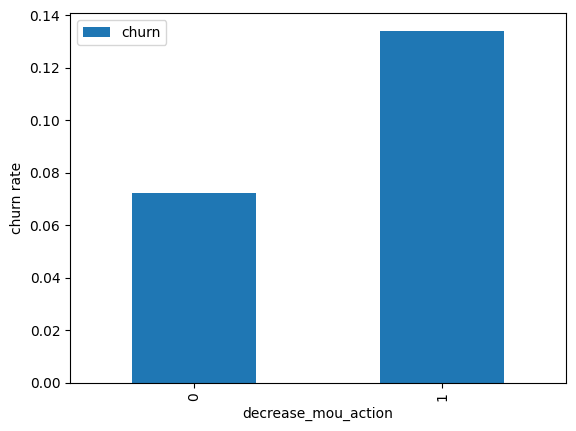

In [53]:
data.pivot_table(values='churn', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

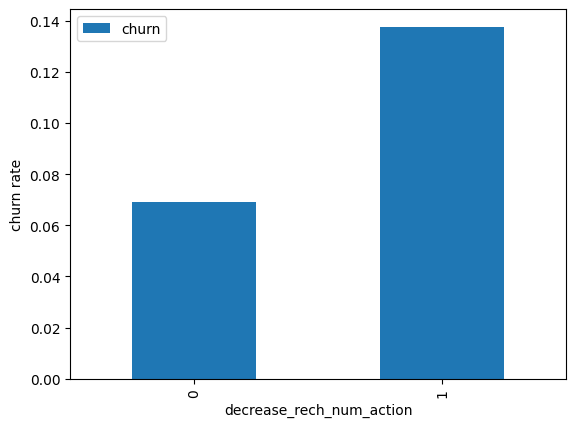

In [54]:
data.pivot_table(values='churn', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

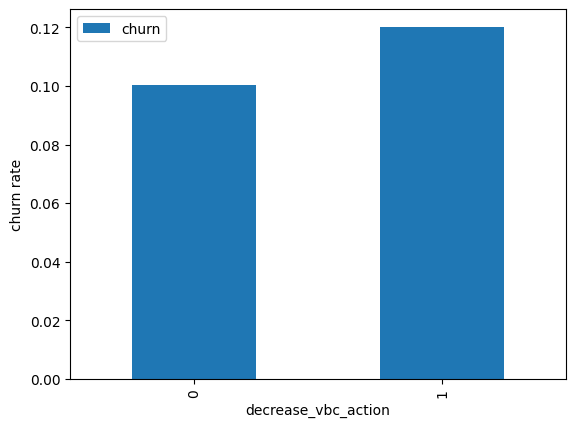

In [55]:
data.pivot_table(values='churn', index='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

'churn' column already exists.


C:\Users\archa\AppData\Local\Temp\ipykernel_7256\1242569699.py:33: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_churn['avg_arpu_action'], label='Churn', hist=False, color='red')
C:\Users\archa\AppData\Local\Temp\ipykernel_7256\1242569699.py:34: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe57

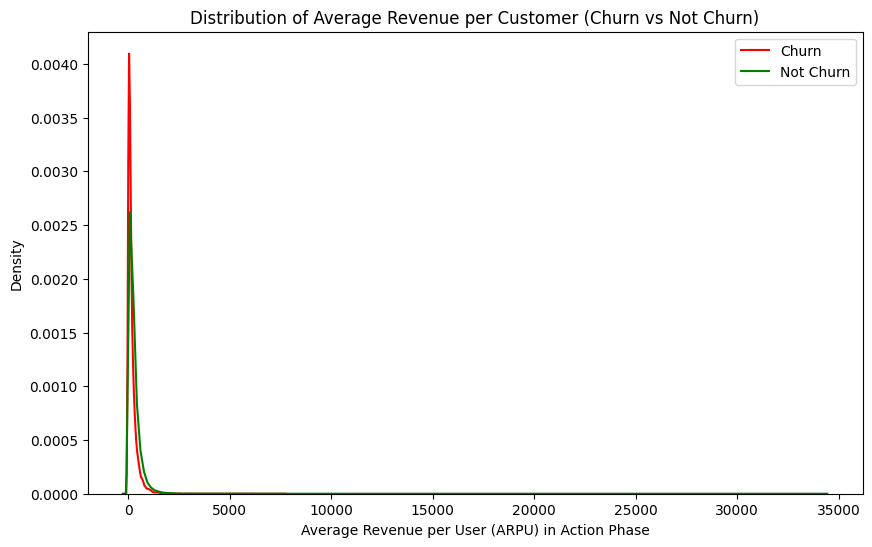

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'churn' column exists
if 'churn' not in data.columns:
    # Create the 'churn' column if it doesn't exist
    data['churn'] = np.where(
        (data['total_ic_mou_9'] == 0) & 
        (data['total_og_mou_9'] == 0) & 
        (data['vol_2g_mb_9'] == 0) & 
        (data['vol_3g_mb_9'] == 0), 1, 0
    )
    print("'churn' column created successfully.")
else:
    print("'churn' column already exists.")

# Convert 'churn' column to int64
data['churn'] = data['churn'].astype('int64')

# Create churn dataframe
data_churn = data[data['churn'] == 1]

# Create not churn dataframe
data_non_churn = data[data['churn'] == 0]

# Calculate average revenue per customer (ARPU) in the action phase (months 7 and 8)
data['avg_arpu_action'] = (data['arpu_7'] + data['arpu_8']) / 2

# Distribution plot for churn and non-churn customers
plt.figure(figsize=(10, 6))
sns.distplot(data_churn['avg_arpu_action'], label='Churn', hist=False, color='red')
sns.distplot(data_non_churn['avg_arpu_action'], label='Not Churn', hist=False, color='green')
plt.xlabel('Average Revenue per User (ARPU) in Action Phase')
plt.ylabel('Density')
plt.title('Distribution of Average Revenue per Customer (Churn vs Not Churn)')
plt.legend()
plt.show()

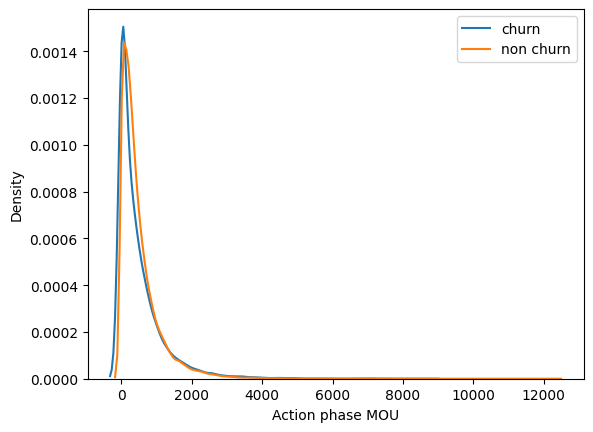

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the columns and DataFrames exist
if 'total_mou_good' in data_churn.columns and 'total_mou_good' in data_non_churn.columns:
    ax = sns.kdeplot(data_churn['total_mou_good'], label='churn', fill=False)
    ax = sns.kdeplot(data_non_churn['total_mou_good'], label='non churn', fill=False)
    ax.set(xlabel='Action phase MOU')
    plt.legend()
    plt.show()
else:
    print("Error: 'total_mou_good' column not found in one or both DataFrames.")

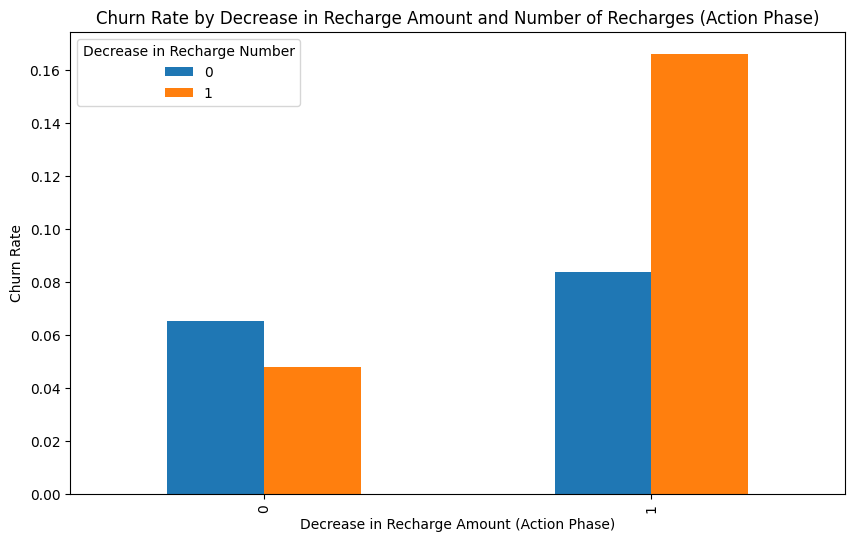

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a pivot table to calculate the mean churn rate
pivot_table = data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean')

# Plot the pivot table as a bar plot
pivot_table.plot.bar(figsize=(10, 6))
plt.ylabel('Churn Rate')
plt.xlabel('Decrease in Recharge Amount (Action Phase)')
plt.title('Churn Rate by Decrease in Recharge Amount and Number of Recharges (Action Phase)')
plt.legend(title='Decrease in Recharge Number')
plt.show()

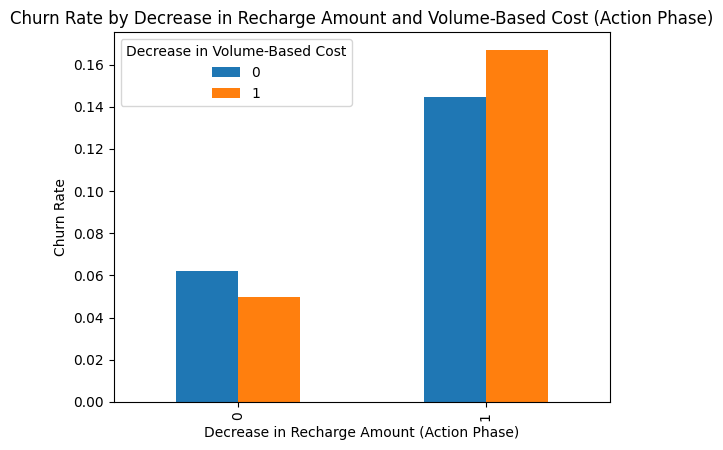

In [60]:
# Check if the required columns exist in the DataFrame
required_columns = ['churn', 'decrease_rech_amt_action', 'decrease_vbc_action']
if all(col in data.columns for col in required_columns):
    # Pivot table and bar plot for churn rate analysis
    data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
    plt.ylabel('Churn Rate')
    plt.xlabel('Decrease in Recharge Amount (Action Phase)')
    plt.title('Churn Rate by Decrease in Recharge Amount and Volume-Based Cost (Action Phase)')
    plt.legend(title='Decrease in Volume-Based Cost')
    plt.show()
else:
    print("Error: One or more required columns are missing in the DataFrame.")

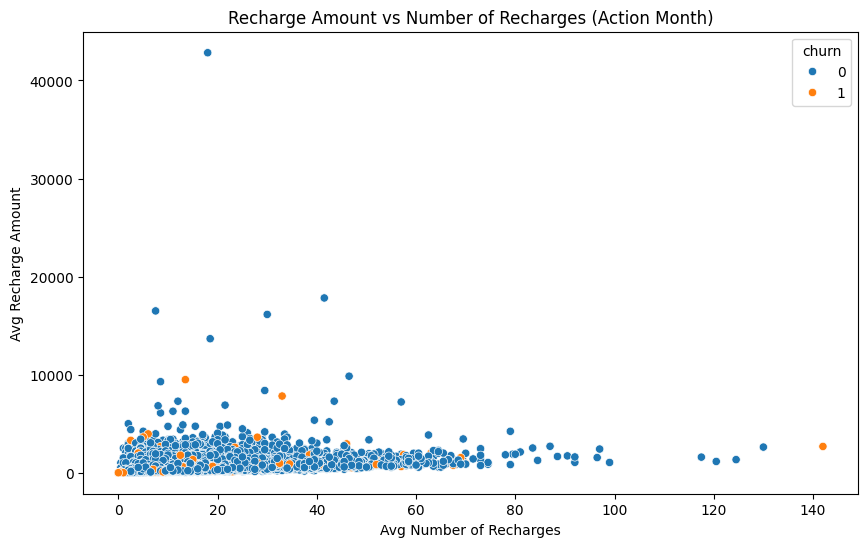

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_rech_num_action', y='avg_rech_amt_action', hue='churn', data=data)
plt.title('Recharge Amount vs Number of Recharges (Action Month)')
plt.xlabel('Avg Number of Recharges')
plt.ylabel('Avg Recharge Amount')
plt.show()

In [62]:
# Import library
from sklearn.model_selection import train_test_split

In [63]:
# Putting feature variables into X
X = data.drop(['mobile_number','churn'], axis=1)

In [64]:
# Putting target variable to y
y = data['churn']

In [65]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [66]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE

In [67]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)

In [68]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE with adjusted n_neighbors
sm = SMOTE(random_state=42, k_neighbors=1)  # Set k_neighbors to 1 or a value less than the minority class samples
X_train, y_train = sm.fit_resample(X_train, y_train)

print("Resampled X_train:\n", X_train)
print("Resampled y_train:\n", y_train)

ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [69]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [70]:
# Instantiate the Scaler
scaler = StandardScaler()

In [71]:
# List of numeric columns excluding specific binary columns
cols_scale = [col for col in X_train.columns if col not in [
    'decrease_mou_action', 'decrease_rech_num_action', 'decrease_rech_amt_action', 
    'decrease_arpu_action', 'decrease_vbc_action'
]]

In [72]:
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [73]:
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action
43958,0.0,0.0,0.0,0.678754,2.605987,2.101779,6.714126,-0.078510,1.851595,1.325406,...,0,2.864446,2.845712,0,2.495516,2.413703,0,-0.270138,-0.039301,0
77473,0.0,0.0,0.0,1.068083,-0.101542,-0.797372,-0.633558,0.028315,-0.124010,-0.432157,...,1,-0.517885,-2.133389,1,-0.481634,-2.108205,1,-0.270138,-0.039301,0
28123,0.0,0.0,0.0,-0.855862,-0.820326,-0.350218,-0.649971,-0.445870,-0.434216,-0.417154,...,0,-0.597987,0.321097,0,-0.618254,0.343949,0,-0.270138,-0.039301,0
31110,0.0,0.0,0.0,-0.310632,-0.537565,-0.802550,-0.762613,0.028012,-0.321976,NaN,...,1,-0.763356,-0.780917,1,-0.713022,-0.529808,1,-0.270138,-0.039301,0
57322,0.0,0.0,0.0,-0.055871,0.037562,-0.189020,-0.124174,-0.355877,-0.317137,-0.353898,...,1,-0.383522,-1.054751,1,-0.081859,-0.033145,1,-0.070162,0.212338,0


In [74]:
# Ensure X_test has the same column names as the data used to fit the scaler
X_test = X_test[scaler.feature_names_in_]

# Scale the selected columns in X_test
X_test[cols_scale] = scaler.transform(X_test[cols_scale])

# Display the updated X_test
print(X_test.head())

       loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
79667             0.0             0.0             0.0 -0.245914 -0.325445   
83841             0.0             0.0             0.0 -0.397512 -0.440845   
57025             0.0             0.0             0.0 -0.389580 -0.541406   
53130             0.0             0.0             0.0 -0.658589 -0.744074   
32612             0.0             0.0             0.0  0.795572 -0.716702   

         arpu_8    arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  ...  \
79667 -0.225580 -0.133413    -0.405596    -0.434216    -0.418366  ...   
83841 -0.427315 -0.225992    -0.445870    -0.434216    -0.432157  ...   
57025  0.149111 -0.522029    -0.445870    -0.434216    -0.432157  ...   
53130 -0.548973 -0.689055    -0.387483    -0.417182    -0.383216  ...   
32612 -0.736297 -0.101564     0.051353    -0.378766    -0.416728  ...   

       avg_mou_action  diff_mou  avg_rech_num_action  diff_rech_num  \
79667       -0.438429 -0.16

In [75]:
#Import PCA
from sklearn.decomposition import PCA

In [76]:
# Instantiate PCA
pca = PCA(random_state=42)

In [81]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Ensure X_test has the same columns as X_train, filling missing columns with NaN
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)  # or fill_value=np.nan

# Impute missing values and apply PCA
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

pca = PCA(random_state=42).fit(X_train_imputed)
X_train_pca, X_test_pca = pca.transform(X_train_imputed), pca.transform(X_test_imputed)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [1.38821754e-01 6.91108251e-02 5.12773297e-02 3.96986842e-02
 3.69083799e-02 3.28793523e-02 2.89752498e-02 2.55617017e-02
 2.37974439e-02 2.15637170e-02 2.04632890e-02 1.97650477e-02
 1.88268449e-02 1.80276205e-02 1.76296649e-02 1.54604656e-02
 1.44366362e-02 1.36902474e-02 1.26154242e-02 1.20520659e-02
 1.16838869e-02 1.13590173e-02 1.09583678e-02 1.04504758e-02
 1.04109460e-02 9.80197777e-03 9.11941579e-03 8.51379555e-03
 8.40762948e-03 8.26638005e-03 7.91765133e-03 7.07464251e-03
 6.81353450e-03 6.68520097e-03 6.29120189e-03 6.18521837e-03
 5.98878734e-03 5.94463469e-03 5.88449011e-03 5.65095036e-03
 5.48903602e-03 5.21363701e-03 5.12910098e-03 4.99677790e-03
 4.95706178e-03 4.86926003e-03 4.74517769e-03 4.54363075e-03
 4.38684791e-03 4.27667414e-03 4.06018602e-03 3.98967345e-03
 3.87024771e-03 3.71147954e-03 3.67819135e-03 3.54462454e-03
 3.50626058e-03 3.48731550e-03 3.42394156e-03 3.36670076e-03
 3.24183467e-03 3.22542717e-03 3.13166002e-03 3.02463156e-0

In [82]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.13882175 0.20793258 0.25920991 0.29890859 0.33581697 0.36869633
 0.39767158 0.42323328 0.44703072 0.46859444 0.48905773 0.50882277
 0.52764962 0.54567724 0.5633069  0.57876737 0.59320401 0.60689425
 0.61950968 0.63156174 0.64324563 0.65460465 0.66556302 0.67601349
 0.68642444 0.69622642 0.70534583 0.71385963 0.72226726 0.73053364
 0.73845129 0.74552593 0.75233946 0.75902467 0.76531587 0.77150109
 0.77748987 0.78343451 0.789319   0.79496995 0.80045898 0.80567262
 0.81080172 0.8157985  0.82075556 0.82562482 0.83037    0.83491363
 0.83930048 0.84357715 0.84763734 0.85162701 0.85549726 0.85920874
 0.86288693 0.86643156 0.86993782 0.87342513 0.87684907 0.88021577
 0.88345761 0.88668304 0.8898147  0.89283933 0.89582848 0.89877664
 0.90166089 0.90448934 0.90723954 0.90995357 0.91261147 0.91518202
 0.91769556 0.92013139 0.92253624 0.92488269 0.92718397 0.9294553
 0.93167628 0.93385236 0.93590575 0.93793246 0.93991114 0.94188602
 0.94381654 0.94572246 0.94756174 0.94933768 0.95104675 0.95273

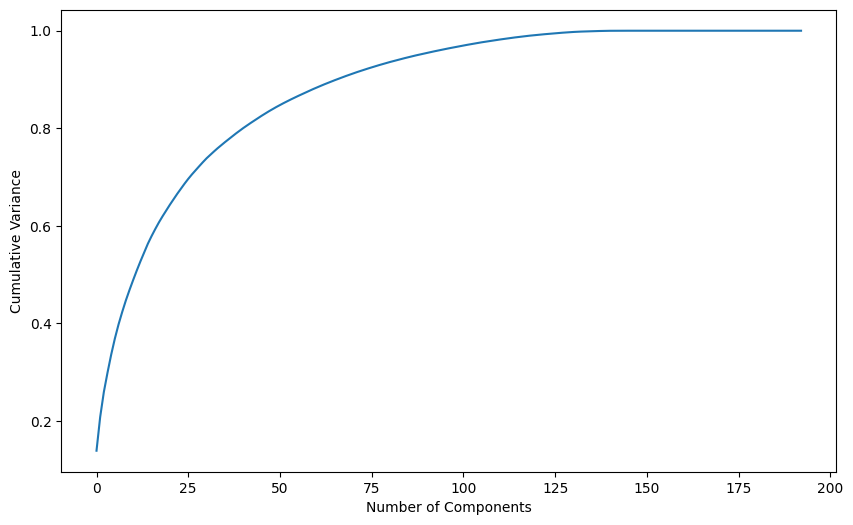

In [83]:
plt.figure(figsize=(10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.show()

In [84]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [85]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [86]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression

# Create KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Create GridSearchCV object with recall scoring
model_cv = GridSearchCV(LogisticRegression(), params, scoring='recall', cv=folds, verbose=1, return_train_score=True)

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\archa\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\archa\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [87]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.300801,0.148902,0.018058,0.001998,0.01,{'C': 0.01},0.768892,0.761759,0.753374,0.778443,...,0.768160,0.009688,6,0.769372,0.774099,0.776034,0.766600,0.771801,0.771581,0.003344
1,1.984603,0.287882,0.013531,0.001643,0.1,{'C': 0.1},0.823048,0.824679,0.819018,0.832335,...,0.828434,0.008506,5,0.834785,0.836464,0.833564,0.828974,0.830192,0.832796,0.002807
2,3.097677,0.699863,0.016074,0.006498,1,{'C': 1},0.904912,0.915699,0.909202,0.920359,...,0.915091,0.007352,4,0.921748,0.924238,0.921397,0.922613,0.921379,0.922275,0.001079
3,3.567042,0.359530,0.019045,0.001817,10,{'C': 10},0.959698,0.948076,0.965644,0.974850,...,0.964050,0.009552,3,0.971878,0.953496,0.979234,0.974617,0.973180,0.970481,0.008848
4,3.302373,0.146491,0.022779,0.003617,100,{'C': 100},0.964736,0.969456,0.969939,0.988024,...,0.973574,0.008021,2,0.977992,0.968124,0.987694,0.982975,0.979464,0.979250,0.006490
5,3.264371,0.169598,0.045538,0.050278,1000,{'C': 1000},0.975441,0.974343,0.979755,0.982036,...,0.978579,0.003119,1,0.979062,0.975054,0.990463,0.980034,0.985441,0.982011,0.005370


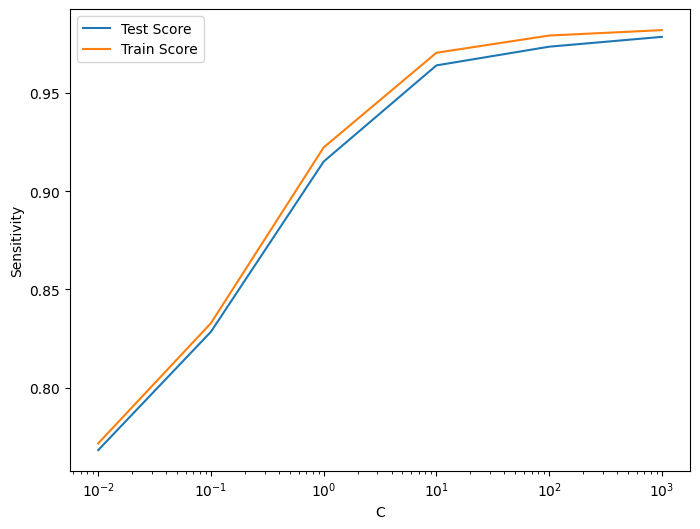

In [88]:
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'], label='Test Score')
plt.plot(cv_results['param_C'], cv_results['mean_train_score'], label='Train Score')
plt.xlabel('C')
plt.ylabel('Sensitivity')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

In [89]:
# Extract the best C value from GridSearchCV results
best_C = model_cv.best_params_['C']

# Instantiate the model with the best C
logistic_pca = LogisticRegression(C=best_C)

In [90]:
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

C:\Users\archa\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [91]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

In [92]:
print(metrics.confusion_matrix(y_train, y_train_pred))

[[71565   303]
 [  169  7962]]


In [93]:
from sklearn import metrics

# Compute confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)

# Extract TN, FP, FN, TP
TN, FP, FN, TP = confusion.ravel()

# Print the values (optional)
print(f"TN: {TN}, FP: {FP}, FN: {FN}, TP: {TP}")

TN: 71565, FP: 303, FN: 169, TP: 7962


In [94]:
from sklearn import metrics

# Accuracy
print("Accuracy:", metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity (Recall)
print("Sensitivity:", metrics.recall_score(y_train, y_train_pred))

# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

Accuracy: 0.9940999262490781
Sensitivity: 0.9792153486656008
Specificity: 0.9957839372182334


In [86]:
# Importing SVC
from sklearn.svm import SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Specify hyperparameters and RBF kernel model
hyper_params = {'gamma': [1e-2, 1e-3, 1e-4], 'C': [1, 10, 100, 1000]}
model_cv = GridSearchCV(SVC(kernel="rbf"), hyper_params, scoring='accuracy', cv=3, verbose=1, return_train_score=True)

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


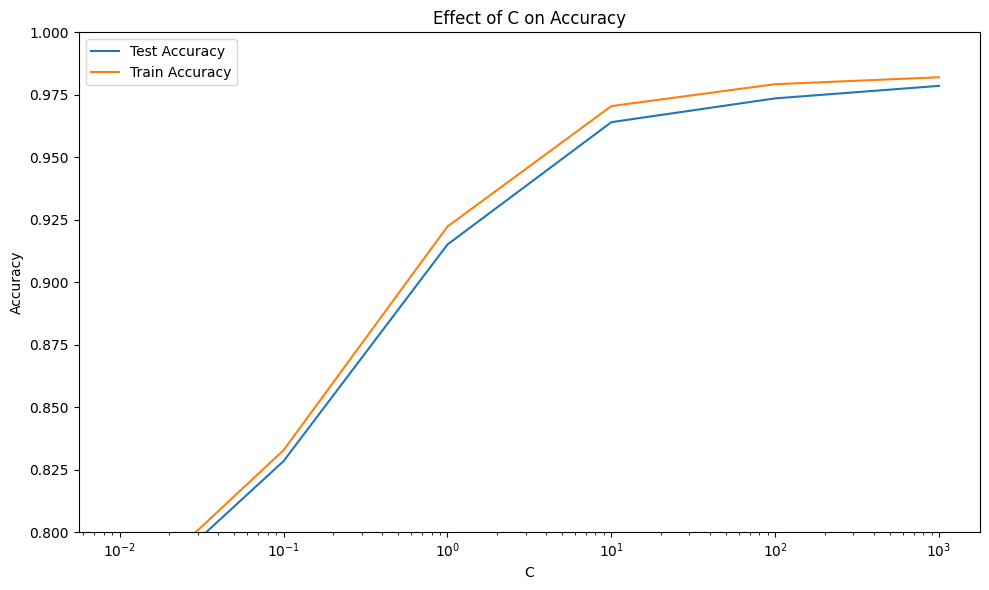

In [96]:
import matplotlib.pyplot as plt

# Ensure cv_results is defined (from GridSearchCV)
cv_results = model_cv.cv_results_

# Convert C to numeric type for plotting
cv_results['param_C'] = cv_results['param_C'].astype('float')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(cv_results["param_C"], cv_results["mean_test_score"], label='Test Accuracy')
plt.plot(cv_results["param_C"], cv_results["mean_train_score"], label='Train Accuracy')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Effect of C on Accuracy")
plt.ylim([0.80, 1])
plt.legend(loc='upper left')
plt.xscale('log')

plt.tight_layout()
plt.show()

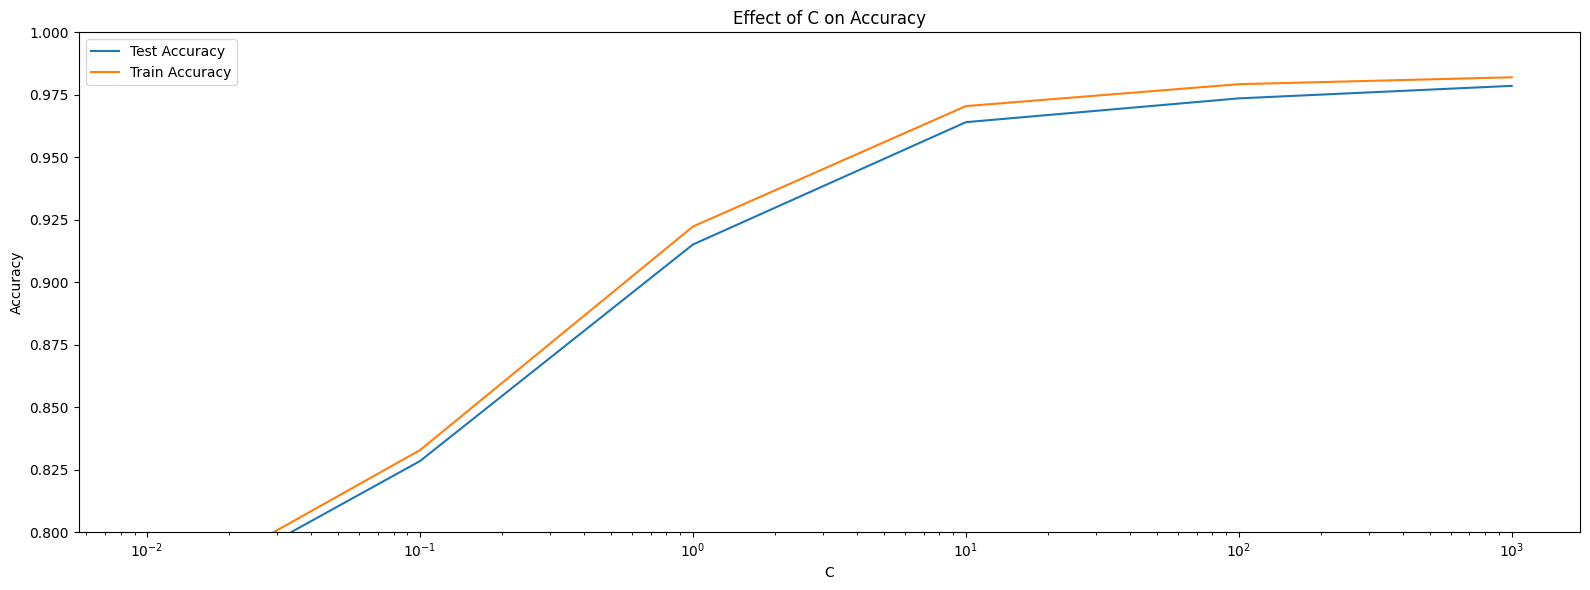

In [98]:
import matplotlib.pyplot as plt

# Ensure cv_results is defined (from GridSearchCV)
cv_results = model_cv.cv_results_

# Convert C to numeric type for plotting
cv_results['param_C'] = cv_results['param_C'].astype('float')

# Plotting
plt.figure(figsize=(16, 6))

# If gamma is part of the grid search
if 'param_gamma' in cv_results:
    gammas = [0.01, 0.001, 0.0001]
    for i, gamma in enumerate(gammas, 1):
        plt.subplot(1, 3, i)
        gamma_data = cv_results[cv_results['param_gamma'] == gamma]
        plt.plot(gamma_data["param_C"], gamma_data["mean_test_score"], label='Test Accuracy')
        plt.plot(gamma_data["param_C"], gamma_data["mean_train_score"], label='Train Accuracy')
        plt.xlabel('C')
        plt.ylabel('Accuracy')
        plt.title(f"Gamma={gamma}")
        plt.ylim([0.80, 1])
        plt.legend(loc='upper left')
        plt.xscale('log')
else:
    # If gamma is not part of the grid search, plot only C
    plt.plot(cv_results["param_C"], cv_results["mean_test_score"], label='Test Accuracy')
    plt.plot(cv_results["param_C"], cv_results["mean_train_score"], label='Train Accuracy')
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.title("Effect of C on Accuracy")
    plt.ylim([0.80, 1])
    plt.legend(loc='upper left')
    plt.xscale('log')

plt.tight_layout()
plt.show()

In [99]:
# Printing the best score 
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9785789392327768 corresponding to hyperparameters {'C': 1000}
